<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 4</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
Gideon Neeman, 329924567   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 4/7/2024 at 23:59

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [141]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [142]:
## Generate 2D data
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

C:\Users\gideo\AppData\Local\Temp\ipykernel_20680\1871301639.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


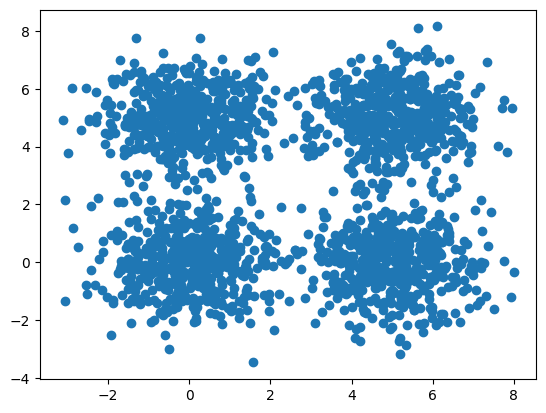

In [143]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [144]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = X      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        self.X_fit_ = X
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[indices]
        for i in range(self.max_iter):
            self._get_distances(X)
            self._get_labels(X)
            self._get_centroids(X, self.labels_)
            self._calculate_cost(X)
        return self.centroids
            
    def predict(self, X):
        distances = self._get_distances(X)
        nearest_centroids = np.argmin(distances, axis=1)
        return nearest_centroids

    def _get_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
        return distances

    def _get_labels(self, X):
        self.labels_ = np.argmin(self._get_distances(X), axis=1)
        self.labels_history.append(self.labels_.copy())
        return self.labels_

    def _get_centroids(self, X, labels):
        self.centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            if len(X[labels == i]) == 0:
                self.centroids[i] = X[np.random.choice(X.shape[0])]
            else:
                self.centroids[i] = X[labels == i].mean(axis=0)
        self.centroids_history.append(self.centroids.copy())
        return self.centroids

    def _calculate_cost(self, X):
        dist = self._get_distances(X)
        min_dist = np.min(dist, axis=1)
        cost = np.sum(min_dist ** 2)
        self.costs.append(cost)
        return cost




Run the algorithm on the 2D dataset

In [145]:
n_clusters = 20
max_iter = 20
kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter)
kmeans.fit(X)

array([[ 4.66853979,  1.62168784],
       [ 1.26605235, -1.40004638],
       [ 6.04526702, -1.15484499],
       [ 4.58426037, -1.10284079],
       [-0.32014258,  4.91305064],
       [ 1.07243015,  5.70341305],
       [ 5.92420088,  0.43162836],
       [ 5.71204221,  4.03024314],
       [-1.39388451, -0.18041503],
       [ 6.14832775,  5.71881094],
       [ 4.1034005 ,  0.2181992 ],
       [ 1.30519614,  0.41265954],
       [ 0.7275865 ,  4.04590815],
       [-0.06183432, -0.78319105],
       [-1.3254178 ,  3.93403471],
       [-0.8181142 ,  6.13798661],
       [ 4.51063538,  6.30217601],
       [-0.16214654,  1.04068742],
       [ 4.90171725,  5.1043955 ],
       [ 3.78804009,  4.48955974]])

Plot a graph of the costs as a function of the iterations

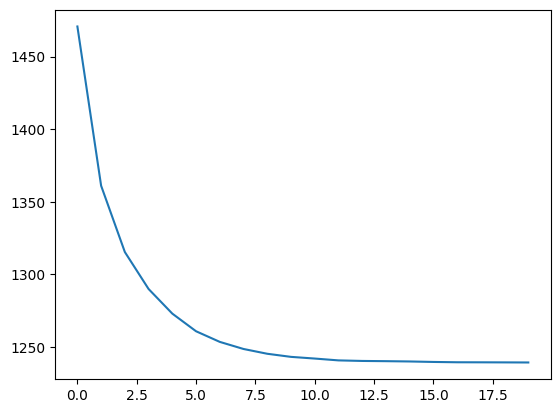

In [146]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 16232.990832780688 <br>
3 clusters: 9859.849320493428 <br>
4 clusters: 3925.999146418897 <br>
6 clusters: 3192.9219394340453 <br>
8 clusters: 2576.802880318959 <br>
10 clusters: 2158.8062372195363 <br>
20 clusters: 1212.2610313372147 <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

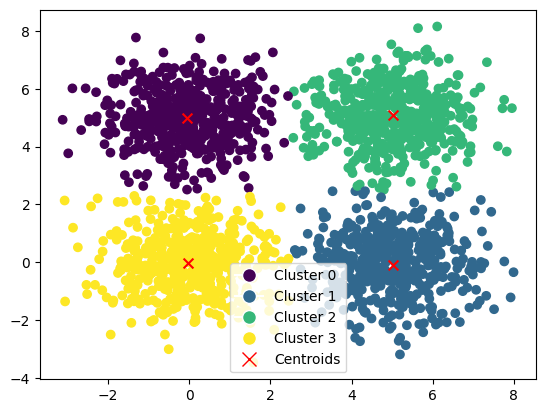

In [147]:
########################
#### YOUR CODE HERE ####
########################
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
n_clusters = 4
max_iter = 20
kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=50, marker='x',label='Centroids')
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
cluster_patches = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=f'Cluster {i}') for i in range(n_clusters)]
centroid_patch = Line2D([0], [0], marker='x', color='red',linestyle='none',markersize=10, label='Centroids')
plt.legend(handles=cluster_patches +[centroid_patch])

plt.show()


## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [148]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [149]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [150]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
        x_mean = np.mean(X, axis=0)
        X = X - x_mean
        cov_matrix = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        self.V = eigenvectors / np.linalg.norm(eigenvectors, axis=0)
        return self.V
    def transform(self, X, n_dimentions):
        X_reduced = None
        cov_matrix = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        self.V = eigenvectors[:n_dimentions]
        X_reduced = np.dot(X, eigenvectors[:, :n_dimentions])
        return X_reduced



Run the algorithm on MNIST dataset.

In [151]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

C:\Users\gideo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


ValueError: 'c' argument has 70000 elements, which is inconsistent with 'x' and 'y' with size 2.

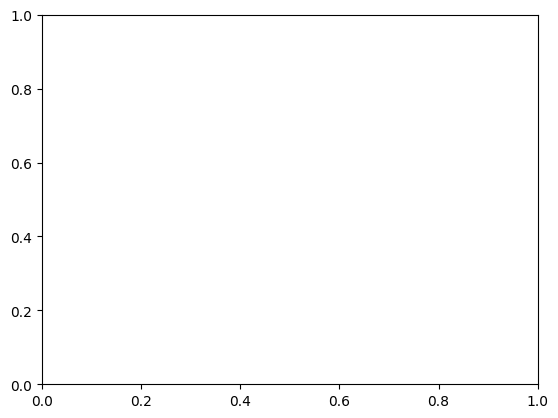

In [152]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

TypeError: Image data of dtype complex128 cannot be converted to float

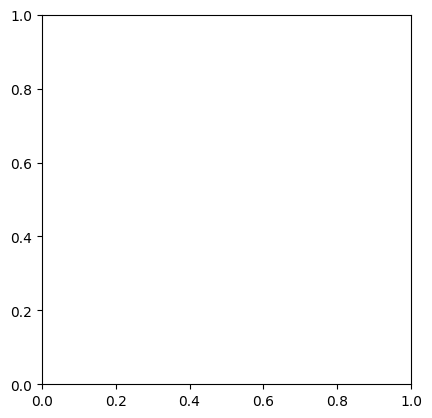

In [ ]:
########################
#### YOUR CODE HERE ####
########################
pca = PCA()
pca.fit(X)
X_reduced = pca.transform(X, 2)
VVt = np.dot(pca.V, pca.V.T)
# reduce the dim of VVt
VVt = VVt[:, :25]
plt.imshow(VVt, cmap='viridis')
plt.title('VVt')
plt.colorbar()
plt.show()
VtV = np.dot(pca.V.T, pca.V)
plt.imshow(VtV)
plt.title('VtV')
plt.colorbar()
plt.show()

Your Explanation: VtV = I because the columns are eigenvectors of the cov matrix and V is orthogonal because the eigenvectors are orthonormal
VVt = represents the projection onto the subspace spanned by the eigenvectors . it equals I only if V is the full basis

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [ ]:
def pca_reconstruction(x, n_dimentions):
    #### YOUR CODE HERE ####
    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


In [ ]:
########################
#### YOUR CODE HERE ####
########################